# GRIP: The Sparks Foundation¶


## Data Science and Business Analytics Intern

Author: Aboubakr Aakou

#### Task 2 : Prediction using Unsupervised ML

 * From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.
Here is an outline of how we can approach this project:

    1. Import the necessary libraries: pandas, numpy, matplotlib, and sklearn.
    2. Load the Iris dataset from the sklearn.datasets module from site: https://bit.ly/3kXTdox.
    3. Create a pandas dataframe from the Iris dataset.
    4. Scale the data using the StandardScaler from sklearn.preprocessing.
    5. Use the elbow method to determine the optimal number of clusters for k-means clustering.
    6. Fit the k-means clustering model using the optimal number of clusters.
    7. Visualize the clusters using a scatter plot.
    8. Optional: compare the predicted clusters with the actual target labels.

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
# 2. Load the Iris dataset
iris = load_iris()

In [4]:
# 3. Create a pandas dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [11]:
# Input features of the Iris dataset
X = iris.data

In [12]:
from bokeh.models import ColumnDataSource
from bokeh.io import show, output_notebook

output_notebook()
# Use the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Create a ColumnDataSource object
source = ColumnDataSource(data=dict(x=range(1, 11), y=wcss))

# Create the figure object
p = figure(title="Elbow Method", x_axis_label="Number of clusters", y_axis_label="WCSS")

# Add a line glyph to the figure object
p.line('x', 'y', source=source, line_width=2)

# Show the plot
show(p)


Loading BokehJS ...

In [13]:
# Create the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

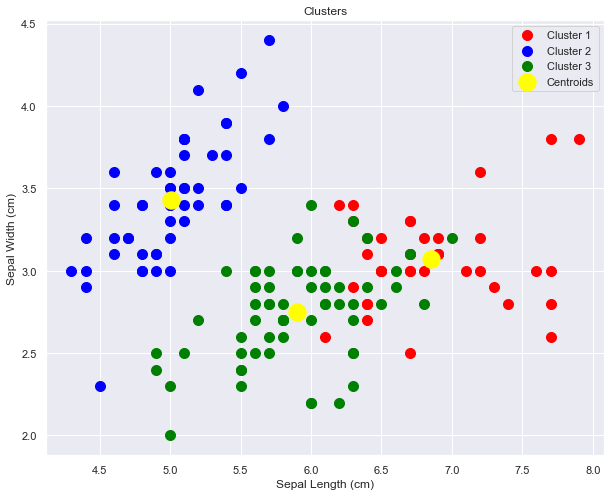

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and size
sns.set(style='darkgrid', rc={'figure.figsize':(10,8)})

# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


## Section optional
The comparison of predicted clusters and actual target labels

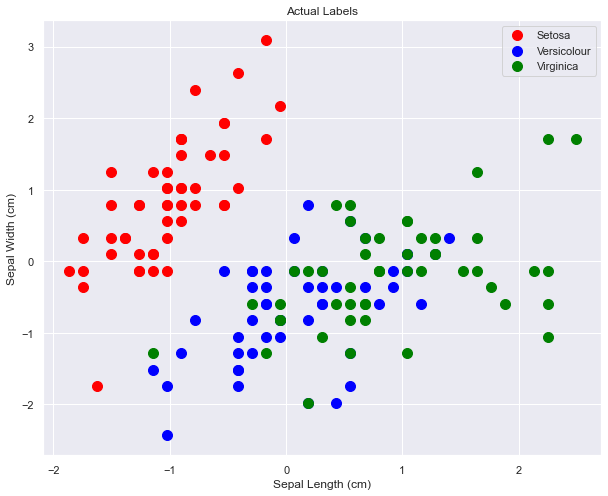

In [28]:

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
# Compare with actual target labels
y = iris.target
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], s = 100, c = 'red', label = 'Setosa')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], s = 100, c = 'blue', label = 'Versicolour')
plt.scatter(X_scaled[y == 2, 0], X_scaled[y == 2, 1], s = 100, c = 'green', label = 'Virginica')
plt.title('Actual Labels')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

## Conclusion

To conclude, we used unsupervised learning techniques in this research to estimate the optimal number of clusters for the Iris dataset using the k-means clustering algorithm.We also visualized the clusters using scatter plots and compared the predicted clusters with the actual target labels. The project's results may be utilized for a variety of reasons, including analyzing the links between various elements of the Iris dataset and recognizing patterns in the data.